In [109]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [110]:
# leitura da imagem
image = cv2.imread('../../assets/da-filhote.png')

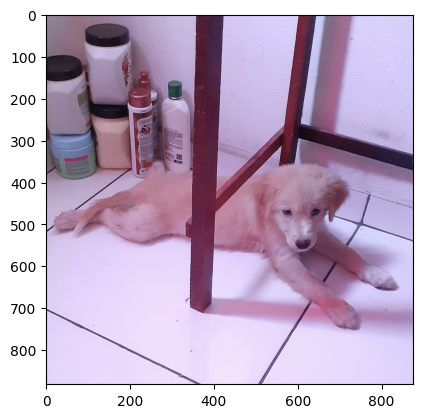

In [111]:
# adicionando as cores no padrão RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

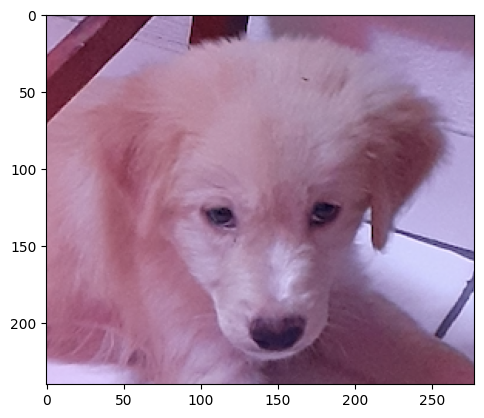

In [112]:
# recuperando o rosto do Dã
daFace = cv2.imread('../../assets/da-face.png')
daFace = cv2.cvtColor(daFace, cv2.COLOR_BGR2RGB)
plt.imshow(daFace)

In [113]:
# array de métodos que serão
methods = {
    'TM_CCOEFF': cv2.TM_CCOEFF,
    'TM_CCOEFF_NORMED': cv2.TM_CCOEFF_NORMED,
    'TM_CCORR': cv2.TM_CCORR,
    'TM_CCORR_NORMED': cv2.TM_CCORR_NORMED,
    'TM_SQDIFF': cv2.TM_SQDIFF,
    'TM_SQDIFF_NORMED': cv2.TM_SQDIFF_NORMED
}

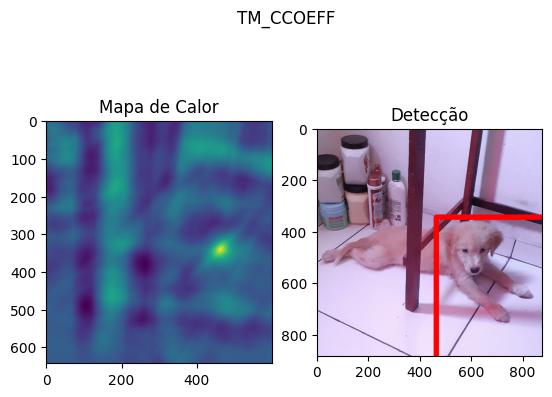

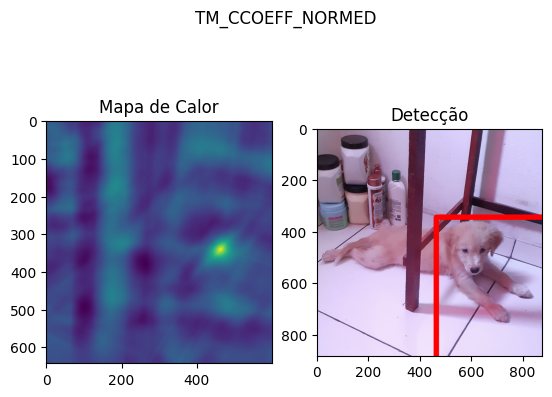

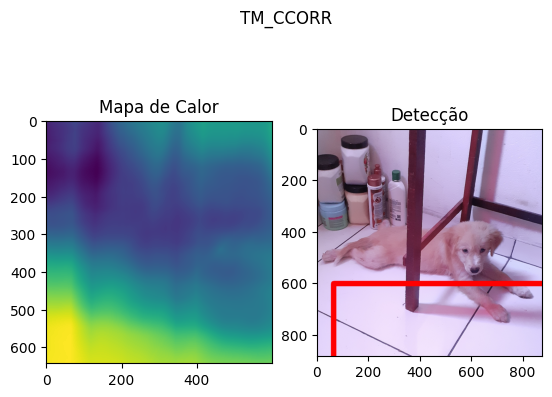

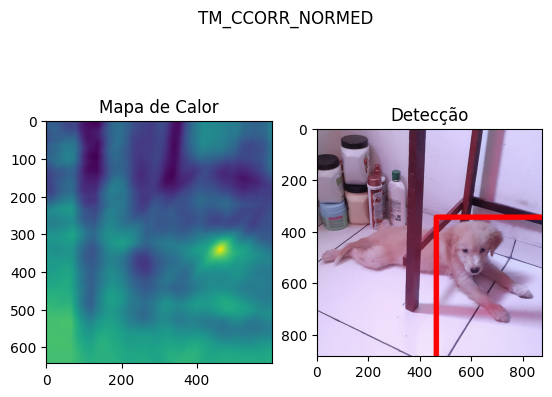

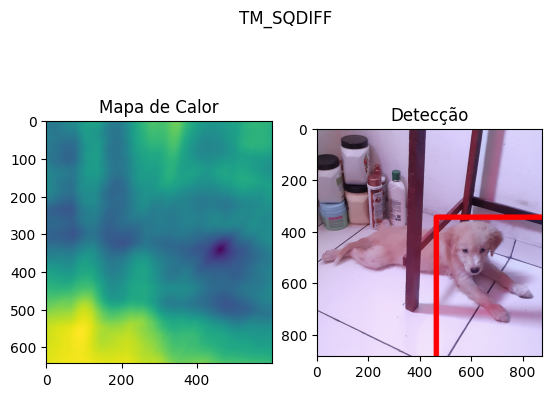

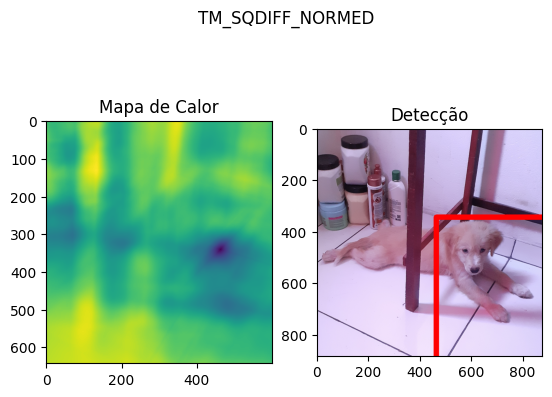

In [114]:
# percorrendo todos os métodos
for methodName, method in methods.items():
    # cria cópia
    copyImage = image.copy()

    # comparando a imagem com a imagem da face utilizando o method atual
    response = cv2.matchTemplate(copyImage, daFace, method)

    # recuperar o valores mínimos e máximos
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(response)

    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        topLeft = min_loc
    else:
        topLeft = max_loc

    # definir a forma do retângulo
    height, width, channels = copyImage.shape

    baseRight = (topLeft[0] + width, topLeft[1] + height)

    cv2.rectangle(copyImage, pt1=topLeft, pt2=baseRight, color=(255,0,0), thickness=20)

    # apresentar as imagens
    plt.subplot(121)
    plt.imshow(response)
    plt.title(f'Mapa de Calor')

    plt.subplot(122)
    plt.imshow(copyImage)
    plt.title(f'Detecção')
    # super título
    plt.suptitle(methodName)

    plt.show()
    print('\n')
